In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Filter for US data analyist jobs

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

In [6]:
#Examine job locations

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


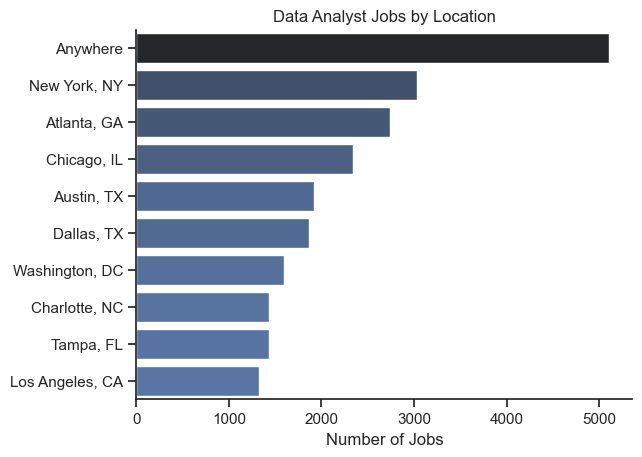

In [13]:
#Plot the data

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine() #Removes border around the inner part of the figure
plt.title('Data Analyst Jobs by Location')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

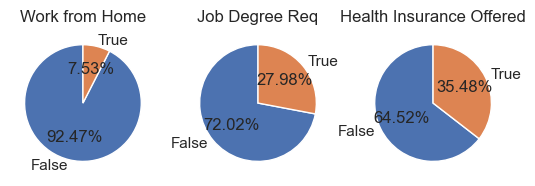

In [14]:
#Pie charts from prior lesson

fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 90, autopct = '%1.2f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show()

In [15]:
#Examine companies

df_plot_company = df_DA_US['company_name'].value_counts().head(10).to_frame()

df_plot_company

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


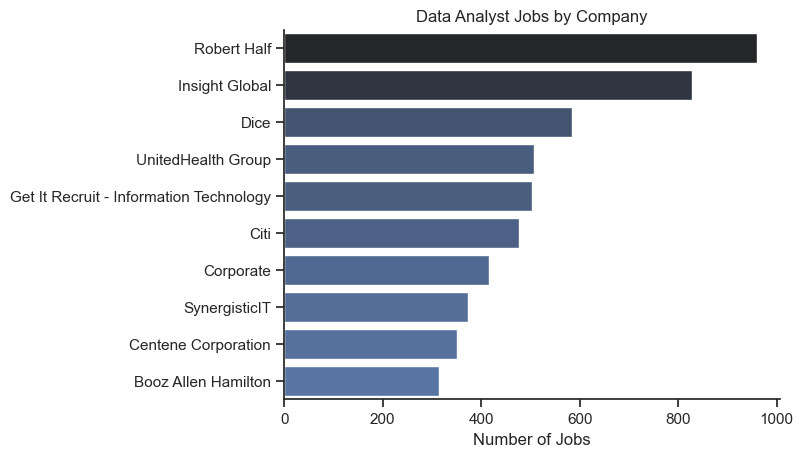

In [16]:
#Plot the data

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot_company, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Data Analyst Jobs by Company')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()